In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


### Prepare data samples

In [66]:
np.random.seed(42)
frog_1 = np.random.normal(20, 2, 100)
frog_2 = np.random.normal(25, 3, 100)

In [67]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data)+1)/len(data)
    return x, y

frog_1_ecdf = ecdf(frog_1)
frog_2_ecdf = ecdf(frog_2)


In [68]:
# get ggaussian 
from random import gauss
def gauss_(mu, sigma, size):
    g_data = np.empty(size)
    for i in range(len(g_data)):
        g_data[i] = gauss(mu, sigma)
    return g_data

frog_3 = gauss_(20, 2.5, 100)
frog_3_ecdf = ecdf(frog_3)

### generating bootstraping samples

In [5]:

print(np.mean(frog_1), np.std(frog_1))
bs_sample = np.random.choice(frog_1, len(frog_1))
print(np.mean(bs_sample), np.std(frog_1))

19.79230696521181 1.8072323532892591
19.69962029942796 1.8072323532892591


In [6]:
# draw bootstra replicates form bootstrap samples

def bs_replicate1d(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

bs_replicate1d(frog_1, np.mean)

19.707727195449422

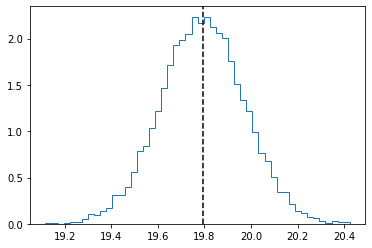

In [7]:
# dra bootstrap samples of size n
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bs_replicate1d(data, func)
    return bs_replicates

plt_bs_reps = draw_bs_reps(frog_1, np.mean, 10000)
_ = plt.hist(plt_bs_reps, bins=50, histtype='step',density=True)
_ = plt.axvline(frog_1.mean(), linestyle='dashed', color='k')
plt.show()

### draw bootstrap replicates of mean and SEM
if we repeat the expirements again and again , we would observe that p% of observations lies within p% confidence interval.

SEM: 0.18072323532892592 
STD: 0.18058718360551376
1.0
Confidence intervals: [19.43839255 20.14571361]


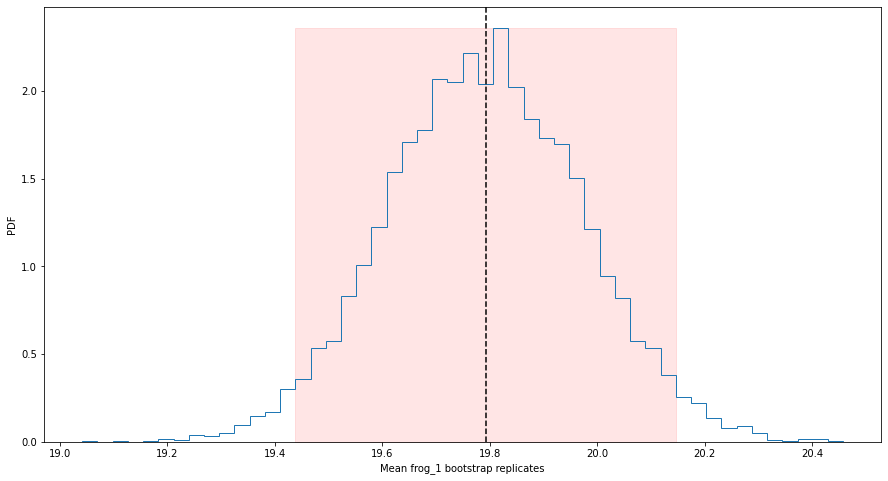

In [8]:

bs_replicates = draw_bs_reps(frog_1, np.mean, 10000)

# computer SEM 
sem = np.std(frog_1)/np.sqrt(len(frog_1))
std = np.std(bs_replicates)

print("SEM:",sem, "\nSTD:",std)

# plt histogram
_ = plt.rcParams["figure.figsize"] = (15,8)
hist, bins, patches = plt.hist(bs_replicates, density=True, bins=50, histtype="step")
_ = plt.xlabel("Mean frog_1 bootstrap replicates")
_ = plt.ylabel("PDF")
_ = plt.axvline(frog_1.mean(), color='k', linestyle='dashed')

print((hist * np.diff(bins)).sum())
ci = np.percentile(bs_replicates,[2.5, 97.5])
print("Confidence intervals:",ci)

plt.fill_between((ci[0], ci[1]),hist.min(), hist.max(),color='red', alpha=0.1)
plt.show()


Confidence Interval: 2.417735508495136 4.130261330727799
1.0


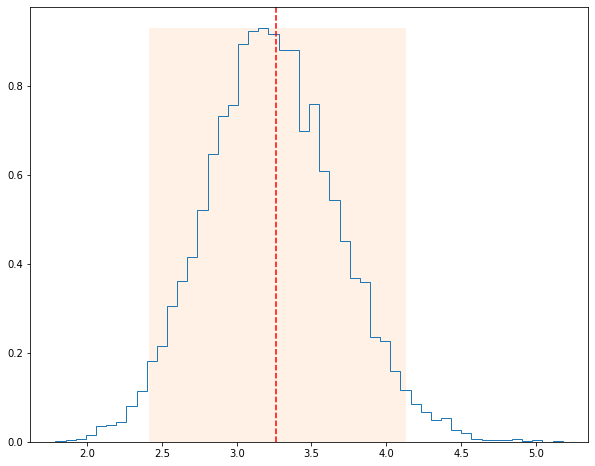

In [9]:
# bs replicates for other statistics
bs_replicates = draw_bs_reps(frog_1, np.var, 10000)
bs_replicates

_ = plt.rcParams["figure.figsize"] = (10, 8)
hist, bins, patches = plt.hist(bs_replicates, bins=50, density=True, histtype='step')
_ = plt.axvline(frog_1.var(), color='red', linestyle="dashed")

ci = np.percentile(bs_replicates, [2.5, 97.5])
_ = plt.fill_between([ci[0], ci[1]], hist.min(), hist.max(), alpha=0.1)

print("Confidence Interval:",ci[0], ci[1])
print((hist * np.diff(bins)).sum())
plt.show()

### Pair bootstrapping for Linear regression
In the above excercise, when we computed bootstrap confidence intervals on summary statistics, we did so 
"NON-PARAMETRICALLY". i.e we did not assume any model underlying the data. the estimates were using the data alone.

- Non-parametric makes no assumption about the model or probability distribution underlying the data.
- Linear model is a parametric estimate where we have slope and intercept.

### Pair bootstrap for linear regression
- resample data points
- Compute slope and intercept from resampled data
- Each slope and intercept is a bootstrap replicate.
- Compute confidence intervals from percentiles of bootstrap replicates.


In [53]:
inds = np.arange(len(frog_1))
bs_inds = np.random.choice(inds, len(inds))
bs_frog1_energy = frog_1[bs_inds]
bs_frog2_energy = frog_2[bs_inds]

# perform linear regression on resamples features
bs_slope, bs_intercept = np.polyfit(bs_frog1_energy, bs_frog2_energy, 1)
print("bs slope:",bs_slope,"bs_intercept:",bs_intercept)

# original slope and intercept
orig_slope, orig_intercept = np.polyfit(frog_1, frog_2, 1)
print("Original slope:",orig_slope,"original intercept:", orig_intercept)

bs slope: -0.547107918642776 bs_intercept: 35.78941971233439
Original slope: -0.21488574040716416 original intercept: 29.319998297735186


In [54]:
inds = np.arange(len(frog_1))
bs_inds = np.random.choice(inds, len(inds))
bs_frog1_energy = frog_1[inds]
bs_frog2_energy = frog_2[inds]

In [75]:
# function to draw bootstrap for pairs in linreg
orig_slope, orig_intercept = np.polyfit(frog_1, frog_3,1)

def draw_bs_pairs_linear_reg(x,y, size=1):
    inds = np.arange(len(x))
    
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)
    return bs_slope_reps, bs_intercept_reps

bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linear_reg(frog_1*frog_3, frog_3,10000)


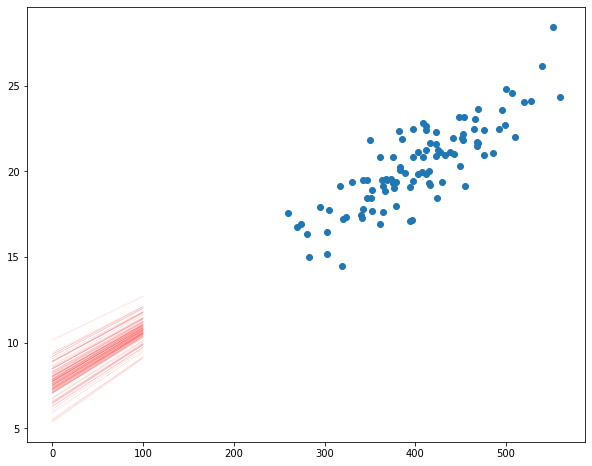

In [76]:
# plotting pair bootstraps for linreg
x = np.array([0,100])

# plot bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                bs_slope_reps[i]*x + bs_intercept_reps[i], 
                linewidth=0.5, alpha=0.2, color='red')

_ = plt.plot(frog_1*frog_3, frog_3, 'o',linestyle="none")
plt.show()

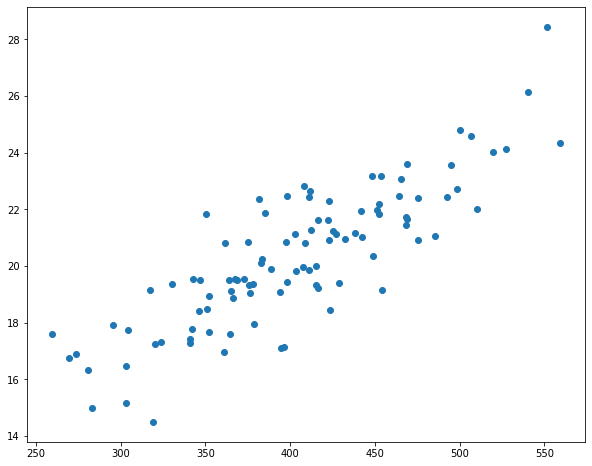

In [77]:
plt.plot(frog_1*frog_3, frog_3, 'o')